# DataSet - Ecomerce
### O dataset "E-Commerce Data" cont√©m registros de transa√ß√µes realizadas entre 01/12/2010 e 09/12/2011 por uma empresa de varejo online sem loja f√≠sica, sediada no Reino Unido

### Principais caracter√≠sticas
Per√≠odo: Dezembro de 2010 a dezembro de 2011

* **Localiza√ß√£o**: Reino Unido, com vendas internas e para outros pa√≠ses
* **Transa√ß√µes**: Inclui detalhes como n√∫mero da fatura, c√≥digo e descri√ß√£o do produto, quantidade, data, pre√ßo unit√°rio, ID do cliente e pa√≠s
* **Volume**: Mais de 500.000 registros


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [14]:
df = pd.read_csv('ecommerce-data.csv', encoding='ISO-8859-1')

In [15]:
# Convers√£o de data e cria√ß√£o de coluna de receita
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [16]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

In [17]:
# Visualiza√ß√£o das colunas
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice']


In [18]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

<Axes: title={'center': 'N√∫mero de Vendas por Pa√≠s'}, xlabel='Country'>

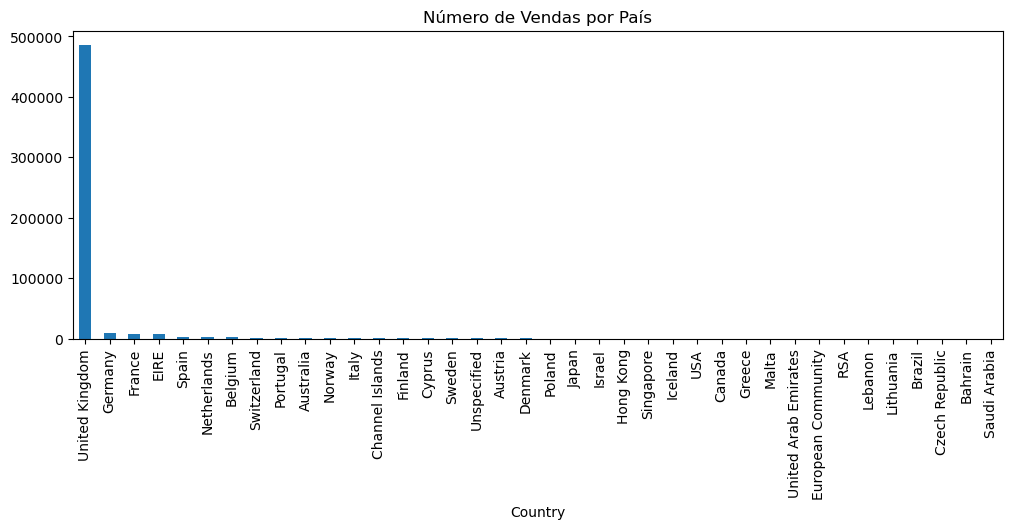

In [19]:
#Distribuicao por pa√≠s
df['Country'].value_counts().plot(kind='bar', figsize=(12, 4), title='N√∫mero de Vendas por Pa√≠s')

In [20]:
# Produtos mais vendidos
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

In [22]:
# Numero de pedidos por cliente
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)


CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [64]:
# Ticket m√©dio por cliente
ticket_medio = df.groupby('CustomerID')['TotalPrice'].sum() / df.groupby('CustomerID')['InvoiceNo'].nunique()
ticket_medio.sort_values(ascending=False).head(10)


CustomerID
16446.0    84236.250000
12346.0    77183.600000
15749.0    14844.766667
15098.0    13305.500000
12357.0     6207.670000
12415.0     5948.310952
12590.0     4932.130000
12688.0     4873.810000
12752.0     4366.780000
18102.0     4327.621667
dtype: float64

Text(0.5, 1.0, 'Boxplot do Valor Total por Transa√ß√£o')

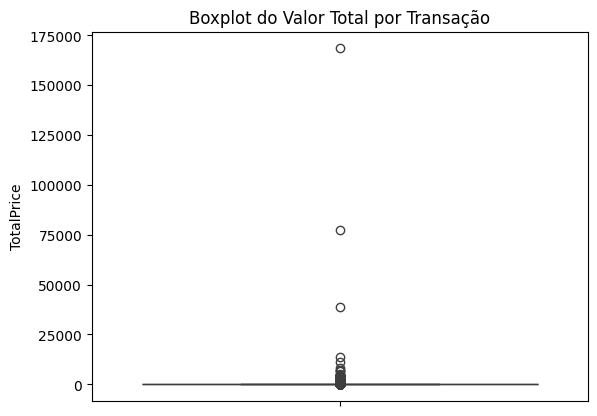

In [65]:
# An√°lise de outliers (total Price)
sns.boxplot(data=df, y='TotalPrice')
plt.title('Boxplot do Valor Total por Transa√ß√£o')



## Limpeza dos dados

In [66]:
# Valores ausentes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
TotalPrice          0
dtype: int64

In [67]:
#Notas de cr√©dito / devolu√ß√µes
df[df['InvoiceNo'].astype(str).str.startswith('C')].head()

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []

In [68]:
# Remover Linhas
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [69]:
# Removendo Precos ou quantidades negativas ou zero
df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [70]:
# Removendo duplicatas
df.duplicated().sum()

np.int64(5226)

In [71]:
df = df.drop_duplicates()

In [72]:
# Verificar dados ausentes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
TotalPrice          0
dtype: int64

<ipython-input-73-1834570965>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['TotalPrice'].resample('M').sum().plot(figsize=(12, 6), title='Receita Mensal Total')


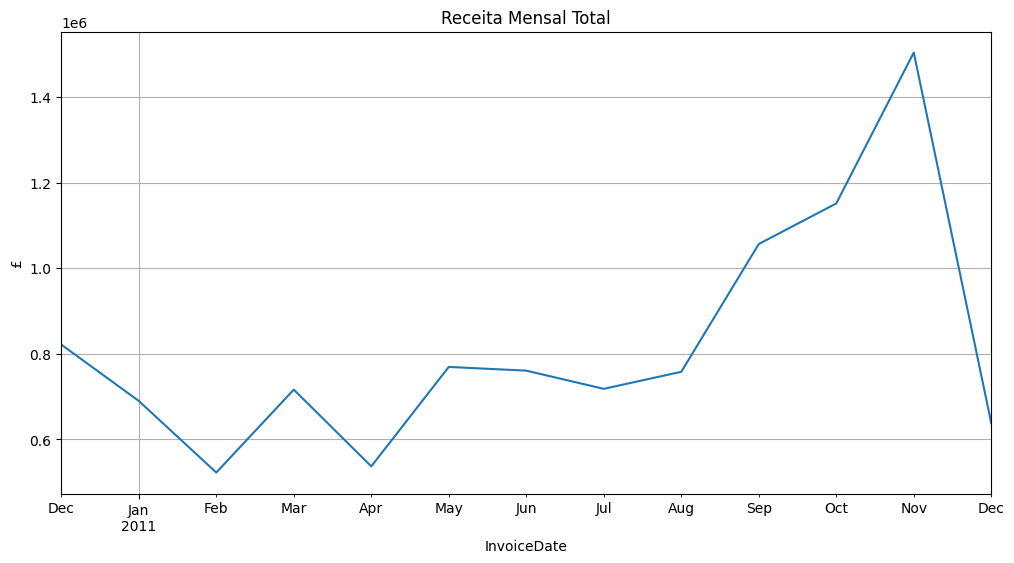

In [73]:
# Receita ao longo do tempo
df.set_index('InvoiceDate', inplace=True)
df['TotalPrice'].resample('M').sum().plot(figsize=(12, 6), title='Receita Mensal Total')
plt.ylabel('¬£')
plt.grid(True)
plt.show()

# Restaurar InvoiceDate como coluna para pr√≥ximos passos
df.reset_index(inplace=True)

##  Conclus√µes da An√°lise Explorat√≥ria
- O dataset apresenta transa√ß√µes de e-commerce com boa granularidade para an√°lises de clientes, produtos e pa√≠ses.
- A maior parte das vendas ocorre no Reino Unido, com alguns outros pa√≠ses contribuindo com menor volume de receita.
- Os produtos com maior faturamento nem sempre s√£o os mais vendidos em quantidade ‚Äî pre√ßo e volume impactam diretamente.
- As receitas mensais ajudam a identificar tend√™ncias, picos de sazonalidade e oportunidades para a√ß√µes comerciais.
- A limpeza de dados foi essencial para remover devolu√ß√µes, transa√ß√µes inv√°lidas e garantir consist√™ncia nas an√°lises.


# An√°lise de comportamento

## Comportamento de recompra por cliente (lealdade)

In [74]:
# N√∫mero de compras por cliente
compras_por_cliente = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# Clientes com mais de 1 compra
clientes_fieis = compras_por_cliente[compras_por_cliente > 1]

print(f"Total de clientes √∫nicos: {df['CustomerID'].nunique()}")
print(f"Clientes com mais de uma compra: {len(clientes_fieis)}")

Total de clientes √∫nicos: 4338
Clientes com mais de uma compra: 2845


<Axes: title={'center': 'Distribui√ß√£o de Compras por Cliente'}, xlabel='InvoiceNo'>

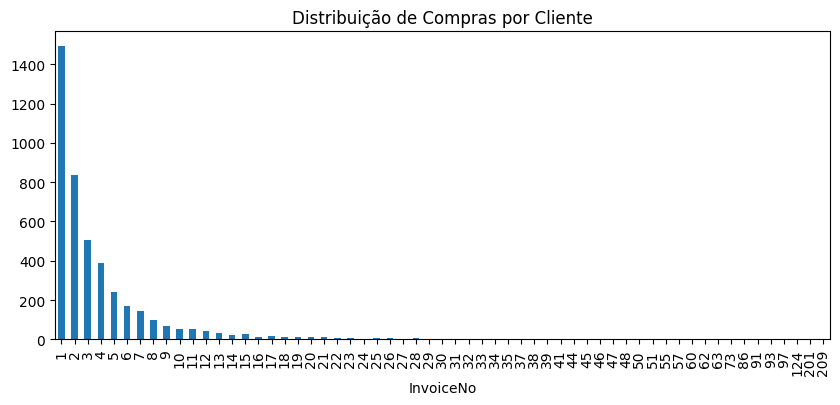

In [75]:
#Visualiza√ß√£o
compras_por_cliente.value_counts().sort_index().plot(kind='bar', figsize=(10, 4), title='Distribui√ß√£o de Compras por Cliente')

# Modelagem de Classifica√ß√£o

## An√°lise de Sazonalidade

<Figure size 1400x600 with 0 Axes>

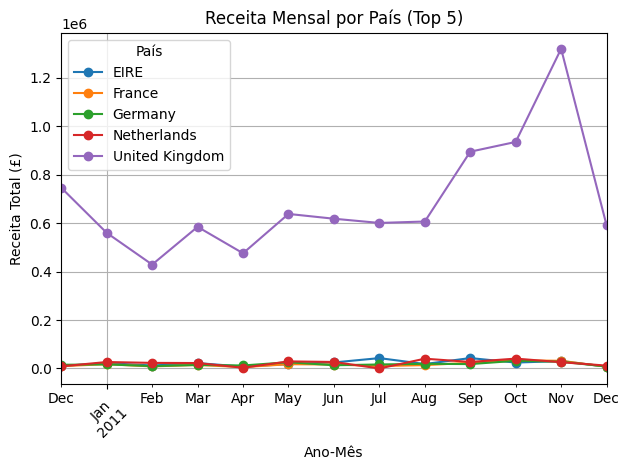

In [79]:
# Selecionar os 5 pa√≠ses com maior receita
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(5).index

# Filtrar a base para os top pa√≠ses
df_top = df[df['Country'].isin(top_countries)]

# Agrupar receita mensal por pa√≠s
monthly_revenue = df_top.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().unstack().fillna(0)

# Plotar gr√°fico de linha
plt.figure(figsize=(14, 6))
monthly_revenue.plot(marker='o')
plt.title('Receita Mensal por Pa√≠s (Top 5)')
plt.xlabel('Ano-M√™s')
plt.ylabel('Receita Total (¬£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Pa√≠s")
plt.show()

## Curva ABC


*   A: ~80% da receita (os "queridinhos")
*   B: ~15%
*   C: ~5%



In [80]:
# Receita total por produto
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

# Calcular participa√ß√£o acumulada
product_revenue['cumulative_pct'] = product_revenue['TotalPrice'].cumsum() / product_revenue['TotalPrice'].sum()

# Classifica√ß√£o ABC
def classifica_abc(pct):
    if pct <= 0.80:
        return 'A'
    elif pct <= 0.95:
        return 'B'
    else:
        return 'C'

product_revenue['Classificacao'] = product_revenue['cumulative_pct'].apply(classifica_abc)

# Exibir top 10
product_revenue.head(10)

Description  TotalPrice  cumulative_pct  \
0                      DOTCOM POSTAGE   206248.77        0.019380   
1            REGENCY CAKESTAND 3 TIER   174156.54        0.035745   
2         PAPER CRAFT , LITTLE BIRDIE   168469.60        0.051576   
3  WHITE HANGING HEART T-LIGHT HOLDER   106236.72        0.061558   
4                       PARTY BUNTING    99445.23        0.070903   
5             JUMBO BAG RED RETROSPOT    94159.81        0.079751   
6      MEDIUM CERAMIC TOP STORAGE JAR    81700.92        0.087428   
7                             POSTAGE    78101.88        0.094767   
8                              Manual    77752.82        0.102073   
9                  RABBIT NIGHT LIGHT    66870.03        0.108357   

  Classificacao  
0             A  
1             A  
2             A  
3             A  
4             A  
5             A  
6             A  
7             A  
8             A  
9             A

## An√°lise por Dia da Semana

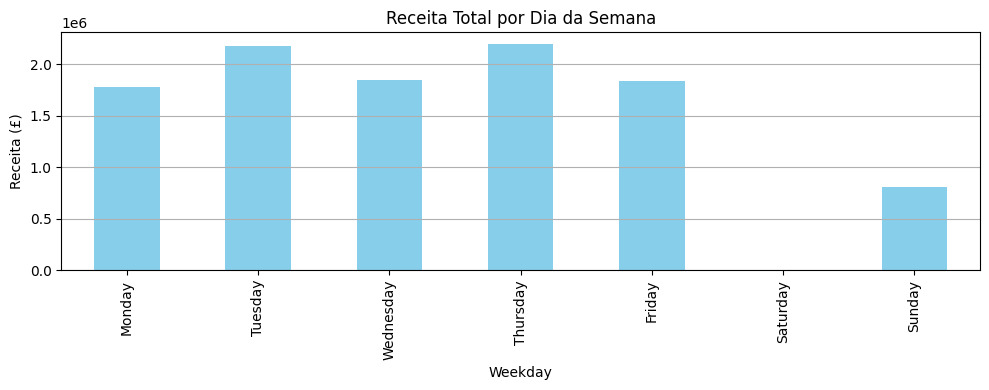

In [81]:
# Criar coluna com dia da semana
df['Weekday'] = df['InvoiceDate'].dt.day_name()

# Receita por dia da semana
weekday_revenue = df.groupby('Weekday')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Gr√°fico
plt.figure(figsize=(10, 4))
weekday_revenue.plot(kind='bar', color='skyblue')
plt.title('Receita Total por Dia da Semana')
plt.ylabel('Receita (¬£)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Clusteriza√ß√£o de Pa√≠ses com KMeans

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [83]:
# Agrupar dados por pa√≠s
country_stats = df.groupby('Country').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    'TotalPrice': 'ReceitaTotal',
    'InvoiceNo': 'NumPedidos',
    'Quantity': 'QtdTotalVendida'
}).reset_index()

# Calcular ticket m√©dio
country_stats['TicketMedio'] = country_stats['ReceitaTotal'] / country_stats['NumPedidos']

# Selecionar as features
features = country_stats[['ReceitaTotal', 'NumPedidos', 'QtdTotalVendida', 'TicketMedio']]

# Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar KMeans (com 3 clusters como exemplo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_stats['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizar os dados com cluster
country_stats.head()

Country  ReceitaTotal  NumPedidos  QtdTotalVendida  TicketMedio  Cluster
0  Australia     138453.81          57            83891  2429.014211        2
1    Austria      10198.68          17             4881   599.922353        0
2    Bahrain        754.14           3              314   251.380000        0
3    Belgium      41196.34          98            23237   420.370816        0
4     Brazil       1143.60           1              356  1143.600000        0

## Gr√°fico dos Clusters de Pa√≠ses

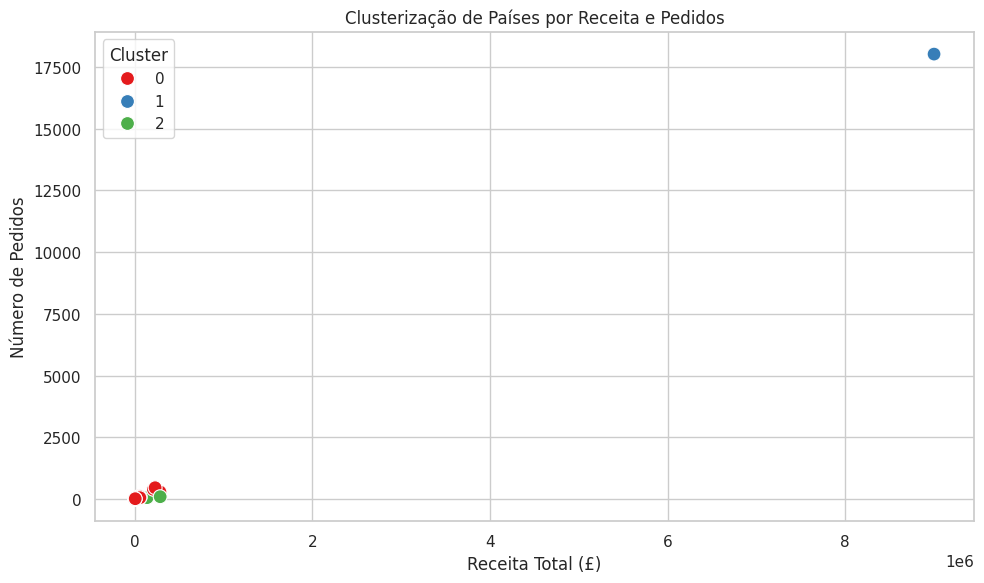

In [84]:
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Gr√°fico de dispers√£o com clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_stats,
    x='ReceitaTotal',
    y='NumPedidos',
    hue='Cluster',
    palette='Set1',
    s=100
)

plt.title('Clusteriza√ß√£o de Pa√≠ses por Receita e Pedidos')
plt.xlabel('Receita Total (¬£)')
plt.ylabel('N√∫mero de Pedidos')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## Estrat√©gia sugerida a partir dos clusters:

An√°lise de Cluster de Pa√≠ses para Expans√£o de Mercado
Com base na clusteriza√ß√£o dos pa√≠ses a partir de vari√°veis como Receita Total, N√∫mero de Pedidos, Volume Vendido e Ticket M√©dio, foram identificados tr√™s perfis distintos de mercado:

üîµ Cluster 1 ‚Äî Mercado Dominante (Reino Unido)
Representado por um √∫nico pa√≠s com receita e volume de pedidos muito superiores aos demais.

Este cluster concentra mais de ¬£8 milh√µes em receita e cerca de 18 mil pedidos.

Conclus√£o: O Reino Unido √© o principal motor de vendas e pode servir como refer√™ncia para estrat√©gias de sucesso. Suas pr√°ticas podem ser replicadas em pa√≠ses com perfil semelhante.

üü¢ Cluster 2 ‚Äî Mercados de Crescimento Moderado
Inclui pa√≠ses com desempenho consistente, embora abaixo do l√≠der.

Receita e volume razo√°veis indicam potencial para expans√£o, principalmente com a√ß√µes localizadas.

Conclus√£o: Esses pa√≠ses devem ser priorizados em planos de crescimento. Ado√ß√£o de campanhas de marketing espec√≠ficas ou melhoria na log√≠stica local pode gerar impacto positivo.

üî¥ Cluster 0 ‚Äî Mercados Emergentes ou Inativos
Engloba pa√≠ses com baixa penetra√ß√£o: poucos pedidos e receita muito limitada.

Alguns pa√≠ses nesse grupo podem ainda estar em fase de explora√ß√£o ou enfrentam barreiras log√≠sticas, culturais ou fiscais.

Conclus√£o: A expans√£o nesses mercados deve ser feita com cautela. Sugere-se testar modelos mais enxutos (marketplaces, parceiros locais) antes de maiores investimentos.


##  Recomenda√ß√£o Final

A an√°lise de cluster mostrou-se eficaz para segmentar mercados com base em comportamento de compra real. Recomenda-se focar:

Manuten√ß√£o e otimiza√ß√£o no Reino Unido (Cluster 1)

Investimento progressivo nos pa√≠ses do Cluster 2

Monitoramento estrat√©gico e a√ß√µes piloto nos pa√≠ses do Cluster 0